<a href="https://colab.research.google.com/github/nilishalu/ML-Learning-Models/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering Algorithm**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Data/data/faithful.csv")
df

,eruption,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


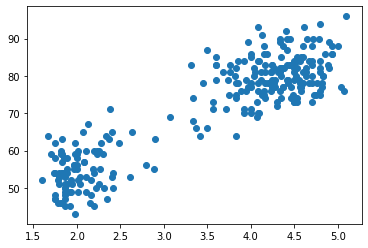

In [5]:
plt.scatter(df['eruption'], df['waiting'])

In [8]:
#convert data into pairs or tuples form which helps to train
X = df.values
X

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


In [9]:
kmeans = KMeans(n_clusters = 2, 
                init = 'random', max_iter = 300)
#random method is used to choose the centroids randomly for the clusters

In [10]:
kmeans.fit(X)

KMeans(init='random', n_clusters=2)

In [12]:
kmeans.cluster_centers_

array([[ 2.09433   , 54.75      ],
       [ 4.29793023, 80.28488372]])

In [15]:
kmeans.inertia_ #distance from the centroids, how well the model did or the error, it has to be minimised

8901.768720947211

In [16]:
kmeans.n_iter_

3

In [19]:
flags = kmeans.labels_ 

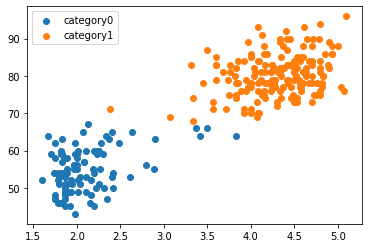

In [25]:
category0 = df[flags == 0]
category1 = df[flags == 1]

plt.scatter(category0['eruption'], category0['waiting'], label = 'category0')
plt.scatter(category1['eruption'], category1['waiting'], label = 'category1')

plt.legend()

In [29]:
kmeans.predict([[3, 50.2]])

array([0], dtype=int32)

A non-spherical clustering example

In [31]:
data = pd.read_csv("/content/drive/MyDrive/Data/data/bulls_eye.csv")[['x', 'y']]
data

,x,y
0,-0.420139,-0.009825
1,-0.056035,0.158766
2,0.694156,-0.563173
3,-0.291152,0.195805
4,0.022523,-0.187408
...,...,...
2995,2.682259,-5.231673
2996,-5.603873,-0.663559
2997,5.224298,-2.026213
2998,-2.991822,5.143475


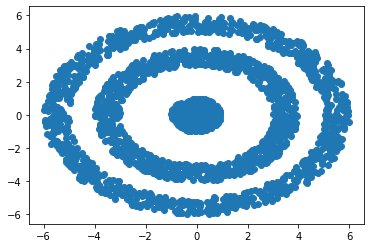

In [33]:
plt.scatter(data['x'], data['y'])

In [39]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300)

X = data.values
kmeans.fit(X)

kmeans.inertia_

20376.78923727851

In [41]:
flags = kmeans.labels_
flags

array([0, 0, 0, ..., 2, 0, 2], dtype=int32)

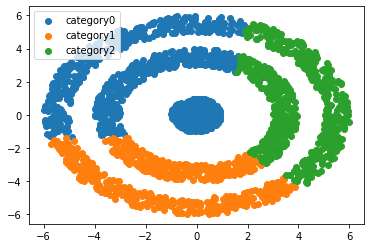

In [43]:
category0 = data[flags == 0]
category1 = data[flags == 1]
category2 = data[flags == 2]

plt.scatter(category0['x'], category0['y'], label = 'category0')
plt.scatter(category1['x'], category1['y'], label = 'category1')
plt.scatter(category2['x'], category2['y'], label = 'category2')

plt.legend()

Transforming data into Polar coordinates

https://en.wikipedia.org/wiki/Polar_coordinate_system

In [45]:
data['r'] = (data['x'] ** 2 + data['y'] ** 2) ** 0.5
data

,x,y,r
0,-0.420139,-0.009825,0.420254
1,-0.056035,0.158766,0.168364
2,0.694156,-0.563173,0.893877
3,-0.291152,0.195805,0.350869
4,0.022523,-0.187408,0.188756
...,...,...,...
2995,2.682259,-5.231673,5.879194
2996,-5.603873,-0.663559,5.643022
2997,5.224298,-2.026213,5.603466
2998,-2.991822,5.143475,5.950322


In [47]:
data['theta'] = np.arcsin(data['y'] / data['r'])
data

,x,y,r,theta
0,-0.420139,-0.009825,0.420254,-0.023380
1,-0.056035,0.158766,0.168364,1.231504
2,0.694156,-0.563173,0.893877,-0.681597
3,-0.291152,0.195805,0.350869,0.592043
4,0.022523,-0.187408,0.188756,-1.451190
...,...,...,...,...
2995,2.682259,-5.231673,5.879194,-1.097043
2996,-5.603873,-0.663559,5.643022,-0.117862
2997,5.224298,-2.026213,5.603466,-0.369983
2998,-2.991822,5.143475,5.950322,1.043961


Text(0, 0.5, 'theta')

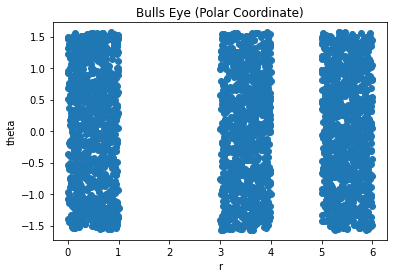

In [49]:
plt.scatter(data['r'], data['theta'])
plt.title('Bulls Eye (Polar Coordinate)')
plt.xlabel('r')
plt.ylabel('theta')

Text(0, 0.5, 'theta')

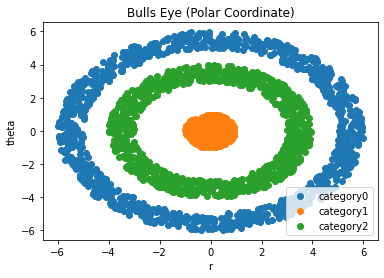

In [53]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300)

X = data[['r', 'theta']].values
kmeans.fit(X)

kmeans.inertia_

flags = kmeans.labels_

category0 = data[flags == 0]
category1 = data[flags == 1]
category2 = data[flags == 2]

plt.scatter(category0['x'], category0['y'], label = 'category0')
plt.scatter(category1['x'], category1['y'], label = 'category1')
plt.scatter(category2['x'], category2['y'], label = 'category2')

plt.legend(loc = 'lower right')
plt.title('Bulls Eye (Polar Coordinate)')
plt.xlabel('r')
plt.ylabel('theta')

In [54]:
kmeans.cluster_centers_

array([[ 5.49209844e+00, -4.59208844e-03],
       [ 4.99423509e-01,  1.61368192e-02],
       [ 3.51257325e+00, -4.12460222e-02]])